In [211]:
import pandas as pd

In [212]:
Td = pd.read_excel('Data_Train.xlsx')

In [213]:
Td.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [214]:
Td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [215]:
Td.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [216]:
Td.dropna(inplace=True)

In [217]:
Td.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [218]:
sample1=Td.copy()

In [219]:
sample1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [220]:
sample1['Date_of_Journey'] = pd.to_datetime(sample1['Date_of_Journey'], dayfirst=True)
sample1['Journey_day']=sample1['Date_of_Journey'].dt.day
sample1['Journey_month']=sample1['Date_of_Journey'].dt.day
sample1['Journey_year']=sample1['Date_of_Journey'].dt.day


In [221]:
sample1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,24,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,1,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,9,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,12,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,1,1


In [222]:
def extract_hour_min(df, col):
    # Ensure the column is in datetime format
    df[col] = pd.to_datetime(df[col], format='%H:%M')  # Adjust the format as per your data

    # Extract hour and minute
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute

    return df


In [223]:
extract_hour_min(sample1, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,24,24,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,1,1,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,9,9,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,12,12,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,1,1,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,22:25,2h 30m,non-stop,No info,4107,9,9,9,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,23:20,2h 35m,non-stop,No info,4145,27,27,27,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,11:20,3h,non-stop,No info,7229,27,27,27,8,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,14:10,2h 40m,non-stop,No info,12648,1,1,1,11,30


In [224]:
def extract_hour_minute(arrival_time_str):
    time_str = arrival_time_str.split()[0]  # Get only the time part
    time_obj = pd.to_datetime(time_str, format='%H:%M').time()
    return time_obj.hour, time_obj.minute

# Apply the function to each row in the 'Arrival_Time' column
sample1['Arrival_Time_hour'], sample1['Arrival_Time_minute'] = zip(*sample1['Arrival_Time'].map(extract_hour_minute))




In [225]:
sample1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,24,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,1,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,9,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,12,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,1,1,1,16,50,21,35


In [226]:
sample1.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [227]:
sample1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,24,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,1,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,9,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,12,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,1,1,16,50,21,35


In [228]:
def time_of_flights(i):
        if i>5 and i <= 12:
            return "Morning"
        elif i>12 and i<=17:
            return "Afternoon"
        elif i>17 and i<=21:
            return "Evening"
        elif i<21 and i<=4:
            return "Nigth"

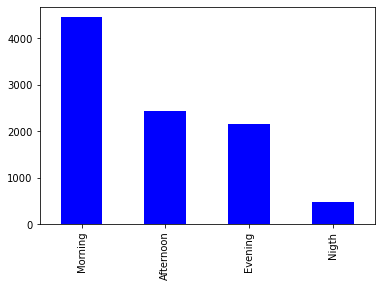

In [229]:
graph=sample1['Dep_Time_hour'].apply(time_of_flights).value_counts().plot(kind='bar', color='blue')

In [230]:
#Dividing the duration

def duration_div(x):
    if 'h' not in x:
        x= '0h' + ' ' + x
    if 'm' not in x:
        x= x + ' ' + '0m'
    return x

In [231]:
sample1['Duration']=sample1['Duration'].apply(duration_div)

In [232]:
sample1['Duration'][0]

'2h 50m'

In [233]:
sample1['Duration'][1]

'7h 25m'

In [234]:
sample1['Duration_Hours'] = sample1['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))
sample1['Duration_Minutes'] = sample1['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [235]:
sample1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,24,24,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,1,1,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,9,9,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,12,12,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,1,1,16,50,21,35,4,45


Finding the relationship between Duration and Price

In [237]:
sample1['Duration_hours_in_minutes'] = sample1['Duration_Hours'] * 60
sample1['Duration_Combined'] = sample1['Duration_hours_in_minutes'] + sample1['Duration_Minutes']


In [238]:
sample1.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_hours_in_minutes,Duration_Combined
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,24,24,22,20,1,10,2,50,120,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,1,1,5,50,13,15,7,25,420,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,9,9,9,25,4,25,19,0,1140,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,12,12,18,5,23,30,5,25,300,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,1,1,16,50,21,35,4,45,240,285
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,24,24,9,0,11,25,2,25,120,145
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,12,12,18,55,10,25,15,30,900,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,1,1,8,0,5,5,21,5,1260,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,12,12,8,55,10,25,25,30,1500,1530
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,27,27,11,25,19,15,7,50,420,470


In [239]:
correlation=sample1['Duration_Combined'].corr(sample1['Price'])

In [240]:
correlation

0.5064797615628508

Write the route in which jetair has maximum number of flights 

In [242]:
new = sample1[sample1['Airline']=='Jet Airways']
count1=new['Route'].value_counts()

print (count1)
        

CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: Route, dtype: int64


Make a boxplot of different airlines

In [244]:
import seaborn as sns

In [245]:
import matplotlib.pyplot as plt

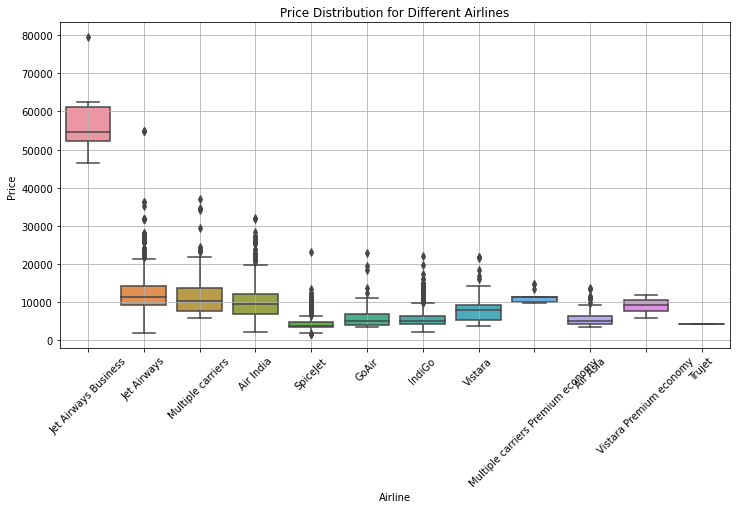

In [246]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=sample1.sort_values('Price', ascending=False)) 
plt.xticks(rotation=45) #rotate the airline names for more easy understadning 
plt.grid(True)  # Add grid
plt.title('Price Distribution for Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

Do feature engineering of doing one-hot encoding(used for numerical data) to make it readable for machine learning algorithms. 

In [248]:
n = []
for col in sample1.columns:
    if sample1[col].dtypes == "object":  
        n.append(col)  

n
        

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [249]:
x= sample1['Source'].unique()
x

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [250]:
sample1['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [251]:
for sub_catagories in x:
    sample1['Sample'+ ' ' + sub_catagories]=sample1['Source'].apply(lambda x: 1 if x==sub_catagories else 0)
    

In [252]:
sample1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_hours_in_minutes,Duration_Combined,Sample Banglore,Sample Kolkata,Sample Delhi,Sample Chennai,Sample Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,10,2,50,120,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,15,7,25,420,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,25,19,0,1140,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,30,5,25,300,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,35,4,45,240,285,1,0,0,0,0


Now do feature scaling on Airline according to mean price. Target guide encoding.

In [254]:
sample1['Airline'].nunique()

12

In [255]:
sample1.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [256]:
airlines=sample1.groupby(['Airline'])['Price'].mean().sort_values().index

In [257]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [258]:
airlines_dict = {key:index for index, key in enumerate(airlines,0)}

In [259]:
airlines_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [260]:
sample1['Airline']=sample1['Airline'].map(airlines_dict)

In [261]:
sample1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_hours_in_minutes,Duration_Combined,Sample Banglore,Sample Kolkata,Sample Delhi,Sample Chennai,Sample Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,10,2,50,120,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,15,7,25,420,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,25,19,0,1140,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,30,5,25,300,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,35,4,45,240,285,1,0,0,0,0


New do feature scaling of Destination 

In [263]:
sample1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [264]:
sample1['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [265]:
sample1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [266]:
Destination_new=sample1.groupby(['Destination'])['Price'].mean().sort_values().index

In [267]:
Destination_new

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [268]:
Destination_dict = {key:index for index, key in enumerate(Destination_new,0)}

In [269]:
Destination_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [270]:
sample1['Destination']=sample1['Destination'].map(Destination_dict)

In [271]:
sample1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_hours_in_minutes,Duration_Combined,Sample Banglore,Sample Kolkata,Sample Delhi,Sample Chennai,Sample Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,10,2,50,120,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,15,7,25,420,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,25,19,0,1140,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,30,5,25,300,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,35,4,45,240,285,1,0,0,0,0


Do feature scaling on Total_Stops

In [273]:
sample1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [274]:
stop_dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [275]:
sample1['Total_Stops']=sample1['Total_Stops'].map(stop_dict)

In [276]:
sample1.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_hours_in_minutes,Duration_Combined,Sample Banglore,Sample Kolkata,Sample Delhi,Sample Chennai,Sample Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,10,2,50,120,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,15,7,25,420,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,25,19,0,1140,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,30,5,25,300,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,1,...,35,4,45,240,285,1,0,0,0,0


Drop Columns that are uneccesary 

In [278]:
sample1['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

As more the number is for 'No info' we can drop it

We can drop route as well as it is correlated to Total_Stops

In [281]:
sample1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_Hours',
       'Duration_Minutes', 'Duration_hours_in_minutes', 'Duration_Combined',
       'Sample Banglore', 'Sample Kolkata', 'Sample Delhi', 'Sample Chennai',
       'Sample Mumbai'],
      dtype='object')

We already did feature encoding on Soruce so we can remove it 

In [283]:
sample1.drop(columns=['Date_of_Journey', 'Route', 'Source', 'Duration_Combined', 'Journey_year'], axis=1, inplace = True)

In [284]:
sample1.drop(['Additional_Info'], axis=1, inplace=True)

In [285]:
sample1.head()

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_hours_in_minutes,Sample Banglore,Sample Kolkata,Sample Delhi,Sample Chennai,Sample Mumbai
0,3,2,2h 50m,0,3897,24,24,22,20,1,10,2,50,120,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,1,5,50,13,15,7,25,420,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,5h 25m,1,6218,12,12,18,5,23,30,5,25,300,0,1,0,0,0
4,3,2,4h 45m,1,13302,1,1,16,50,21,35,4,45,240,1,0,0,0,0


In [286]:
sample1.drop(['Duration'], axis=1, inplace=True)

In [287]:
sample1.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_hours_in_minutes,Sample Banglore,Sample Kolkata,Sample Delhi,Sample Chennai,Sample Mumbai
0,3,2,0,3897,24,24,22,20,1,10,2,50,120,1,0,0,0,0
1,7,3,2,7662,1,1,5,50,13,15,7,25,420,0,1,0,0,0
2,10,4,2,13882,9,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218,12,12,18,5,23,30,5,25,300,0,1,0,0,0
4,3,2,1,13302,1,1,16,50,21,35,4,45,240,1,0,0,0,0


**Handling Outliers**

In [289]:
import matplotlib.pyplot as plt

In [290]:
def plot(df, col):
    fig ,(ax1, ax2, ax3)=plt.subplots(3,1)
    
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax1, kde=False)
    

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fl

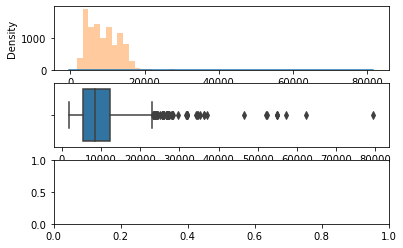

In [291]:
plot(sample1, 'Price')

In [292]:
q1=sample1['Price'].quantile(0.25)
q3=sample1['Price'].quantile(0.75)

iqr=q3-q1

maximum=q3+1.5*iqr
minimum=q1-1.5*iqr


In [293]:
print(maximum)

23017.0


In [294]:
print(minimum)

-5367.0


In [295]:
print([price for price in sample1['Price'] if price>maximum or price<minimum ])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


These all are outliers. We have to add these outliers into median. As it will deduct the outliers from the data for price. 

In [297]:
import numpy as np

we just took an example that a value greater than 35000 to be added to median

In [299]:
sample1['Price']=np.where(sample1['Price']>=35000, sample1['Price'].median(), sample1['Price'])

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


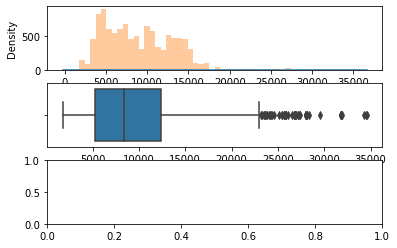

In [300]:
plot(sample1, 'Price')

**Feture Selection**

Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data. 
So we will only choose the relevant and indeoendent variables only that can relate to price.

We will do 'Mutual Information' way to find if 2 random variables are dependent or independent. 
If the MI = 0, both variables are independent
If the MI = 1, both variables are dependent


In [304]:
sample2=sample1.copy()

In [305]:
sample2.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_hours_in_minutes,Sample Banglore,Sample Kolkata,Sample Delhi,Sample Chennai,Sample Mumbai
0,3,2,0,3897.0,24,24,22,20,1,10,2,50,120,1,0,0,0,0
1,7,3,2,7662.0,1,1,5,50,13,15,7,25,420,0,1,0,0,0
2,10,4,2,13882.0,9,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218.0,12,12,18,5,23,30,5,25,300,0,1,0,0,0
4,3,2,1,13302.0,1,1,16,50,21,35,4,45,240,1,0,0,0,0


In [306]:
y=sample2['Price']

In [307]:
X=sample2.drop('Price', axis=1)

In [308]:
from sklearn.feature_selection import mutual_info_regression 

In [319]:
info1=mutual_info_regression(X,y)

In [321]:
info1

array([0.97920104, 1.0089434 , 0.79933161, 0.22794878, 0.23109919,
       0.33212858, 0.25205861, 0.39306997, 0.34065577, 0.45521734,
       0.3419807 , 0.46196278, 0.39592006, 0.44995348, 0.50572396,
       0.13237128, 0.19640016])

In [323]:
info2 = pd.DataFrame(info1, index=X.columns)

In [325]:
info2.columns=['VVImp']

In [327]:
info2

,VVImp
Airline,0.979201
Destination,1.008943
Total_Stops,0.799332
Journey_day,0.227949
Journey_month,0.231099
Dep_Time_hour,0.332129
Dep_Time_minute,0.252059
Arrival_Time_hour,0.393070
Arrival_Time_minute,0.340656
Duration_Hours,0.455217


In [329]:
info2.sort_values(by='VVImp', ascending=False)

,VVImp
Destination,1.008943
Airline,0.979201
Total_Stops,0.799332
Sample Delhi,0.505724
Duration_hours_in_minutes,0.461963
Duration_Hours,0.455217
Sample Kolkata,0.449953
Sample Banglore,0.395920
Arrival_Time_hour,0.393070
Duration_Minutes,0.341981


In [331]:
from sklearn.model_selection import train_test_split

In [335]:
X_train, X_test, y_train, y_test=train_test_split(
    X,y, test_size=0.25, random_state=43)

In [337]:
from sklearn.ensemble import RandomForestRegressor

In [339]:
m1_model=RandomForestRegressor()

In [341]:
m1_model.fit(X_train, y_train)

RandomForestRegressor()

In [355]:
y_pred=m1_model.predict(X_test)

In [357]:
y_pred

array([ 8602.6975    , 11841.05066667, 11220.33866667, ...,
        9208.568     ,  4486.88709524, 13079.86580952])

In [353]:
from sklearn import metrics

In [359]:
metrics.r2_score(y_test, y_pred)

0.7391621124086876